# Use tf.placeholder

## Objectives

* use tf.placeholder for input
* use dictionaries to change the input
* use a helper function to learn the logical operators AND, OR, NAND, NOR, XOR

> A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data http://learningtensorflow.com/lesson4/

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tf.__version__

'0.10.0'

<img align="left" src="files/modified.png"> **Modified Code:**

* added parameters num_features and num_classes
* change the definition of x, y, weights, biases

In [6]:
num_features = 2
num_classes = 2

x = tf.placeholder(tf.float32, [None, num_features])
y = tf.placeholder(tf.float32, [None, num_classes])

weights = tf.Variable(tf.random_normal([num_features, num_classes]))
biases = tf.Variable(tf.random_normal([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)

loss = (y - y_pred)**2

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

## Create dictionaries for logical functions

<img align="left" src="files/new.png"> **New Code:** just dictionaries to feed into the newly modified graph

In [7]:
and_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[1.,0.],[1.,0.],[0.,1.]]}
or_dic   = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[0.,1.]]}
nand_dic = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[0.,1.],[0.,1.],[1.,0.]]}
nor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[1.,0.],[1.,0.],[1.,0.]]}
xor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[1.,0.]]}

<img align="left" src="files/old.png"> **Same helper** function used earlier to plot matrices as heatmaps

In [8]:
def heatmap(data):
    data = map(abs, data)
    img = plt.imshow(data, interpolation='nearest')
    img.set_cmap('inferno')
    plt.clim(0,1)
    plt.axis('off')    
    plt.show()    

<img align="left" src="files/new.png"> **Straight forward new code:** create the helper function that will run the learner and print the heatmap

In [9]:
def learn(feed_dict):
    for i in range(0,100):
        sess.run(train_step, feed_dict=feed_dict)
    print "Predicted"
    heatmap(sess.run(y_pred, feed_dict=feed_dict))
    print "Error"
    heatmap(sess.run(y_pred, feed_dict=feed_dict)-sess.run(y, feed_dict=feed_dict))

## Run on AND

Predicted


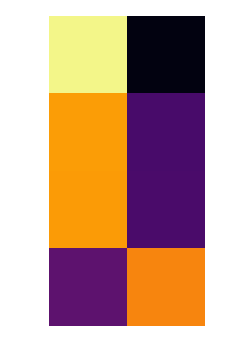

Error


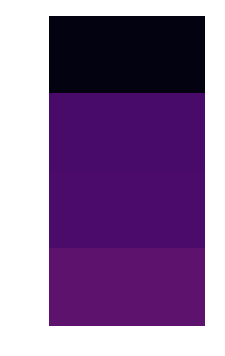

In [10]:
learn(and_dic)

## Run on OR

Predicted


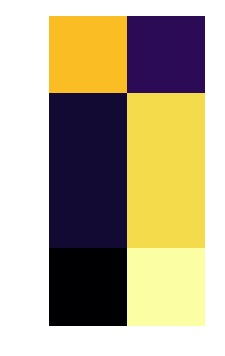

Error


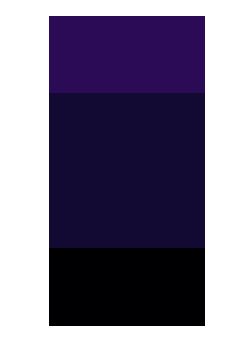

In [11]:
learn(or_dic)

## Run NAND

Predicted


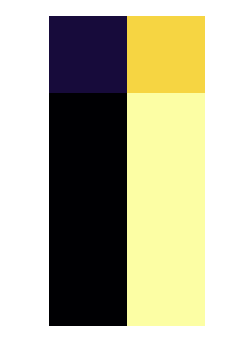

Error


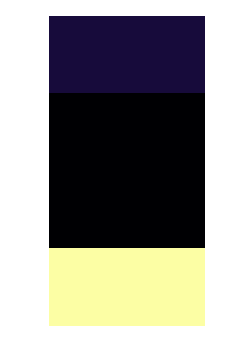

In [12]:
learn(nand_dic)

## Run NOR

Predicted


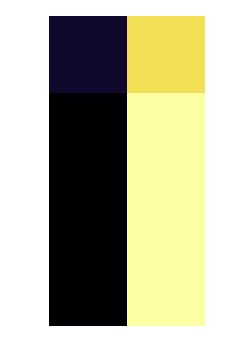

Error


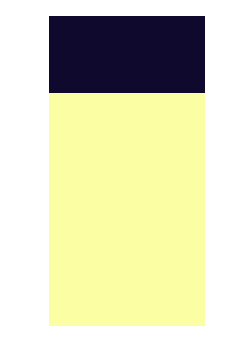

In [13]:
learn(nor_dic)

## Run XOR

Predicted


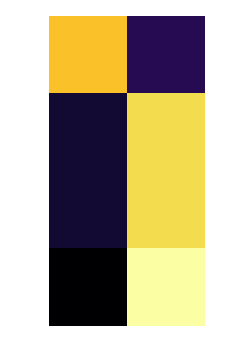

Error


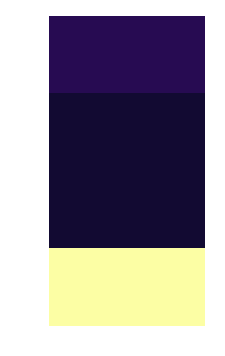

In [14]:
learn(xor_dic)

## Observations

* AND and OR are learned
* NAND and NOR are not, although they should
* XOR is not linearly separable and cannot be learned by a single perceptron